<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (15,8)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [2]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [5]:
df["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [6]:
df["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [7]:
df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [8]:
df["Car_Name"].value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Hero Passion X pro     1
Honda Dream Yuga       1
land cruiser           1
Bajaj Pulsar RS200     1
Yamaha Fazer           1
Name: Car_Name, Length: 98, dtype: int64

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [9]:
df["Transmission"] = df["Transmission"].replace({"Manual":1,"Automatic":0})

In [10]:
df["Seller_Type"] = df["Seller_Type"].replace({"Dealer":0, "Individual":1})

In [11]:
df["Fuel_Type"] = df["Fuel_Type"].replace({"Petrol":0, "Diesel":1, "CNG":2})

In [12]:
df["Age"] = 2021-df["Year"]
# Araç yaşı burda hesaplandı

In [13]:
df = df.drop(["Car_Name","Year"], axis = 1)
# Araç markası - > 98 adet araç maraksı olduğu için 300 adet veri içinde tahmine bir etki etmeyeceği için çıkarıldı
# Araç yaşı hesaplandığı için "Year" sütunu çıkarıldı

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,0,0,1,0,7
1,4.75,9.54,43000,1,0,1,0,8
2,7.25,9.85,6900,0,0,1,0,4
3,2.85,4.15,5200,0,0,1,0,10
4,4.60,6.87,42450,1,0,1,0,7


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    int64  
 4   Seller_Type    301 non-null    int64  
 5   Transmission   301 non-null    int64  
 6   Owner          301 non-null    int64  
 7   Age            301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [16]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.212625,0.352159,0.867110,0.043189,7.372093
std,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.900000,1.200000,15000.000000,0.000000,0.000000,1.000000,0.000000,5.000000
50%,3.600000,6.400000,32000.000000,0.000000,0.000000,1.000000,0.000000,7.000000
75%,6.000000,9.900000,48767.000000,0.000000,1.000000,1.000000,0.000000,9.000000
max,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000,18.000000


In [17]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,0.509467,-0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.440415,-0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.166801,-0.101419,-0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440415,0.166801,1.000000,-0.352415,-0.080466,-0.055705,-0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,0.063240,0.124269,0.039896
Transmission,-0.367128,-0.348715,-0.162510,-0.080466,0.063240,1.000000,-0.050316,-0.000394
Owner,-0.088344,0.008057,0.089216,-0.055705,0.124269,-0.050316,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,-0.053643,0.039896,-0.000394,0.182104,1.000000


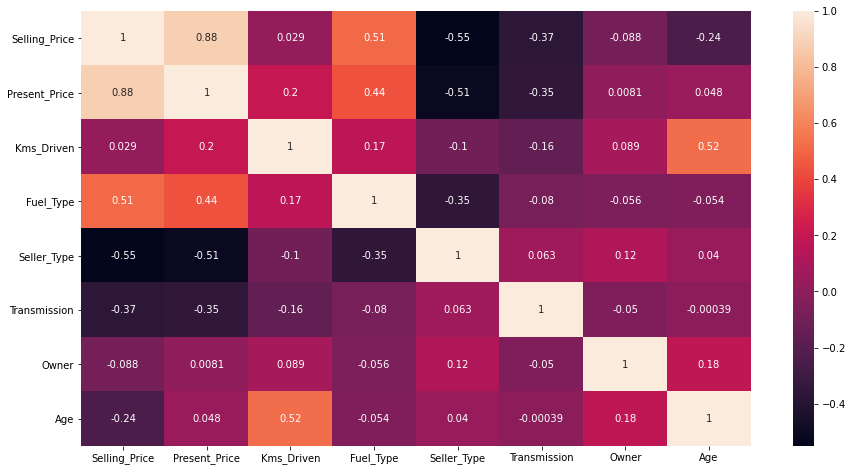

In [18]:
sns.heatmap(df.corr(), annot = True);

### Features and target variable

In [19]:
X= df.drop("Selling_Price", axis = 1)
y= df["Selling_Price"]

### Splitting data into training and testing

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
print("Train features shape :", X_train.shape)
print("Train features shape :", y_train.shape)
print("Train features shape :", X_test.shape)
print("Train features shape :", y_test.shape)

Train features shape : (225, 7)
Train features shape : (225,)
Train features shape : (76, 7)
Train features shape : (76,)


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()

In [24]:
scaler.fit(X_train) 

MinMaxScaler()

In [25]:
X_train = scaler.transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

##  Model Building (Linear Regression)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [28]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [29]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = linear_model.predict(X_test)

In [31]:
y_train_pred = linear_model.predict(X_train)

# Interpret the model

In [32]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8778410038265465
MAE 		: 1.1739214684316115
MSE 		: 3.072960228378444
RMSE 		: 1.7529860890430489


In [33]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8750976760292404
MAE 		: 1.2330843382595158
MSE 		: 3.4316043692566027
RMSE 		: 1.852459006093415


# Model Evaluation

In [34]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,1.752986,1.852459
mae,1.173921,1.233084
mse,3.072960,3.431604
R2,0.877841,0.875098


# Linear Model with Cross Validation

In [35]:
from sklearn.model_selection import cross_validate, cross_val_score
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [36]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002994,0.002990,0.817641,-1.409561,-4.498540,-2.120976
2,0.001994,0.001996,0.819568,-1.904746,-11.783119,-3.432655
3,0.002992,0.002992,0.759117,-0.936152,-1.729177,-1.314982
4,0.001994,0.001998,0.559536,-1.685136,-5.018456,-2.240191
5,0.000997,0.001995,0.901463,-0.928505,-2.156167,-1.468389
6,0.003990,0.000998,0.943798,-0.854226,-0.947977,-0.973641
7,0.000997,0.000997,0.799399,-1.553705,-8.913151,-2.985490
8,0.000000,0.001994,0.720882,-1.058831,-3.057957,-1.748701
9,0.001003,0.000993,0.874405,-1.350902,-3.334992,-1.826196
10,0.001000,0.001991,0.879552,-0.884381,-1.158043,-1.076124


In [37]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.807536
test_neg_mean_absolute_error       -1.256615
test_neg_mean_squared_error        -4.259758
test_neg_root_mean_squared_error   -1.918735
dtype: float64

In [38]:
lm_df = pd.DataFrame(linear_model.coef_, columns = ["lm_coef"])
lm_df
# Linear modelin katsayılara verdiği değer

,lm_coef
0,40.119202
1,-2.333951
2,2.553883
3,-1.242204
4,-1.546202
5,-3.089165
6,-5.289064


# Regularization

# Ridge

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge_model = Ridge(alpha=1)

In [41]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [42]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8126964750182872
MAE 		: 1.4178957278565676
MSE 		: 5.146033910905297
RMSE 		: 2.2684871414458794


In [43]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8092249806387171
MAE 		: 1.4175959790834314
MSE 		: 4.799024758135228
RMSE 		: 2.1906676512276406


In [44]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,2.190668,2.268487
mae,1.417596,1.417896
mse,4.799025,5.146034
R2,0.809225,0.812696


In [45]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [46]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.820495,-1.373584,-4.428136,-2.104314
2,0.739417,-2.626774,-17.017372,-4.125212
3,0.613278,-1.170477,-2.776078,-1.666157
4,0.445323,-1.976847,-6.319747,-2.513911
5,0.852002,-0.977512,-3.238472,-1.799576
6,0.858999,-1.264390,-2.378314,-1.542178
7,0.665994,-2.066392,-14.840654,-3.852357
8,0.663225,-1.445980,-3.689638,-1.920843
9,0.850236,-1.417487,-3.976772,-1.994185
10,0.817392,-1.012784,-1.755666,-1.325015


In [47]:
pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:].mean()

test_r2                             0.732636
test_neg_mean_absolute_error       -1.533223
test_neg_mean_squared_error        -6.042085
test_neg_root_mean_squared_error   -2.284375
dtype: float64

In [48]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8126964750182872
MAE 		: 1.4178957278565676
MSE 		: 5.146033910905297
RMSE 		: 2.2684871414458794


In [49]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])
rm_df
# Ridge modelin katsayılara verdiği değer

,ridge_coef_1
0,22.676564
1,-1.144001
2,4.324692
3,-2.626058
4,-2.751864
5,-1.432788
6,-4.459078


In [50]:
pd.concat([lm_df,rm_df], axis = 1)
# Lineer model ile Ridge modelin karşılaştırması

,lm_coef,ridge_coef_1
0,40.119202,22.676564
1,-2.333951,-1.144001
2,2.553883,4.324692
3,-1.242204,-2.626058
4,-1.546202,-2.751864
5,-3.089165,-1.432788
6,-5.289064,-4.459078


# Ridge Model with Cross Validation

In [51]:
from sklearn.linear_model import RidgeCV

In [52]:
alpha_space = np.linspace(0.001, 1, 100)  # bu aralığı azaltıp arttırabiliriz
alpha_space   

array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0.31381818, 0.32390909, 0.334     , 0.34409091,
       0.35418182, 0.36427273, 0.37436364, 0.38445455, 0.39454545,
       0.40463636, 0.41472727, 0.42481818, 0.43490909, 0.445     ,
       0.45509091, 0.46518182, 0.47527273, 0.48536364, 0.49545455,
       0.50554545, 0.51563636, 0.52572727, 0.53581818, 0.54590909,
       0.556     , 0.56609091, 0.57618182, 0.58627273, 0.59636364,
       0.60645455, 0.61654545, 0.62663636, 0.63672727, 0.64681818,
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772

In [53]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [54]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0....
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [55]:
ridge_cv_model.alpha_

0.14227272727272727

In [56]:
y_pred = ridge_cv_model.predict(X_test)

In [57]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8671379819140106
MAE 		: 1.2672221148931377
MSE 		: 3.6502914219503797
RMSE 		: 1.9105735845421865


In [58]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.8741704673888523
MAE 		: 1.1943515639980204
MSE 		: 3.165294095250044
RMSE 		: 1.7791273409315154


In [59]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.779127,1.910574
mae,1.194352,1.267222
mse,3.165294,3.650291
R2,0.874170,0.867138


In [60]:
pd.concat([ls, rs, rcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,1.752986,1.852459,2.190668,2.268487,1.779127,1.910574
mae,1.173921,1.233084,1.417596,1.417896,1.194352,1.267222
mse,3.072960,3.431604,4.799025,5.146034,3.165294,3.650291
R2,0.877841,0.875098,0.809225,0.812696,0.874170,0.867138


In [61]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["Ridge_cv_coef_0.14"])

In [62]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.14
0,40.119202,22.676564,36.073789
1,-2.333951,-1.144001,-2.027801
2,2.553883,4.324692,3.019815
3,-1.242204,-2.626058,-1.561049
4,-1.546202,-2.751864,-1.836747
5,-3.089165,-1.432788,-2.663402
6,-5.289064,-4.459078,-5.138543


# Lasso

In [63]:
from sklearn.linear_model import Lasso, LassoCV

In [64]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [65]:
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.12213371341035528
MAE 		: 3.221915948275862
MSE 		: 24.11876487894121
RMSE 		: 4.911085916469107


In [66]:
y_train_pred = lasso_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.12396631167833239
MAE 		: 3.041903524904215
MSE 		: 22.036990866475097
RMSE 		: 4.694357343287268


In [67]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,4.694357,4.911086
mae,3.041904,3.221916
mse,22.036991,24.118765
R2,0.123966,0.122134


In [68]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,1.752986,1.852459,2.190668,2.268487,1.779127,1.910574,4.694357,4.911086
mae,1.173921,1.233084,1.417596,1.417896,1.194352,1.267222,3.041904,3.221916
mse,3.072960,3.431604,4.799025,5.146034,3.165294,3.650291,22.036991,24.118765
R2,0.877841,0.875098,0.809225,0.812696,0.874170,0.867138,0.123966,0.122134


In [69]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [70]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.134682,-3.450774,-21.346205,-4.620195
2,0.007171,-5.052171,-64.836703,-8.052124
3,-0.092160,-2.541971,-7.840052,-2.800009
4,0.246291,-2.397726,-8.587428,-2.930431
5,0.123385,-2.791489,-19.181910,-4.379716
6,0.156772,-2.428900,-14.223030,-3.771343
7,0.028783,-3.422057,-43.153372,-6.569123
8,-0.169668,-2.676915,-12.814631,-3.579753
9,0.029453,-3.786762,-25.771496,-5.076563
10,0.273466,-2.227497,-6.985201,-2.642953


In [71]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.073818
test_neg_mean_absolute_error        -3.077626
test_neg_mean_squared_error        -22.474003
test_neg_root_mean_squared_error    -4.442221
dtype: float64

In [72]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                              0.073818
test_neg_mean_absolute_error        -3.077626
test_neg_mean_squared_error        -22.474003
test_neg_root_mean_squared_error    -4.442221
dtype: float64

In [73]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.12213371341035528
MAE 		: 3.221915948275862
MSE 		: 24.11876487894121
RMSE 		: 4.911085916469107


In [74]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [75]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.14,lasso_coef_1
0,40.119202,22.676564,36.073789,0.000000
1,-2.333951,-1.144001,-2.027801,0.000000
2,2.553883,4.324692,3.019815,0.000000
3,-1.242204,-2.626058,-1.561049,-1.350315
4,-1.546202,-2.751864,-1.836747,-0.000000
5,-3.089165,-1.432788,-2.663402,-0.000000
6,-5.289064,-4.459078,-5.138543,-0.000000


In [76]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0....
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
        cv=10, max_iter=100000)

In [77]:
lasso_cv_model.alpha_

0.03127272727272727

In [78]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8594496608473577
MAE 		: 1.2660028665791683
MSE 		: 3.8615226891183947
RMSE 		: 1.9650757464073476


In [79]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8678179759056006
MAE 		: 1.1670394170876994
MSE 		: 3.32509365394507
RMSE 		: 1.8234839330098498


In [80]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,1.823484,1.965076
mae,1.167039,1.266003
mse,3.325094,3.861523
R2,0.867818,0.859450


In [81]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,1.752986,1.852459,2.190668,2.268487,1.779127,1.910574,4.694357,4.911086,1.823484,1.965076
mae,1.173921,1.233084,1.417596,1.417896,1.194352,1.267222,3.041904,3.221916,1.167039,1.266003
mse,3.072960,3.431604,4.799025,5.146034,3.165294,3.650291,22.036991,24.118765,3.325094,3.861523
R2,0.877841,0.875098,0.809225,0.812696,0.874170,0.867138,0.123966,0.122134,0.867818,0.859450


In [82]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.03"])
lcm_df

,lasso_cv_coef_0.03
0,35.587290
1,-0.000000
2,2.381017
3,-1.610533
4,-1.465598
5,-0.000000
6,-5.096480


In [83]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.14,lasso_coef_1,lasso_cv_coef_0.03
0,40.119202,22.676564,36.073789,0.000000,35.587290
1,-2.333951,-1.144001,-2.027801,0.000000,-0.000000
2,2.553883,4.324692,3.019815,0.000000,2.381017
3,-1.242204,-2.626058,-1.561049,-1.350315,-1.610533
4,-1.546202,-2.751864,-1.836747,-0.000000,-1.465598
5,-3.089165,-1.432788,-2.663402,-0.000000,-0.000000
6,-5.289064,-4.459078,-5.138543,-0.000000,-5.096480


## Elastic-Net 

In [84]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [85]:
elastic_model.l1_ratio

0.5

In [86]:
elastic_model.alpha

1.0

In [87]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.10556591267215942
MAE 		: 3.276810414810923
MSE 		: 24.573953666425066
RMSE 		: 4.95721228781107


In [88]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.10645229733824435
MAE 		: 3.094719351503545
MSE 		: 22.477563163172114
RMSE 		: 4.7410508500934805


In [89]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,4.741051,4.957212
mae,3.094719,3.276810
mse,22.477563,24.573954
R2,0.106452,0.105566


In [90]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,1.752986,1.852459,2.190668,2.268487,1.779127,1.910574,4.694357,4.911086,1.823484,1.965076,4.741051,4.957212
mae,1.173921,1.233084,1.417596,1.417896,1.194352,1.267222,3.041904,3.221916,1.167039,1.266003,3.094719,3.276810
mse,3.072960,3.431604,4.799025,5.146034,3.165294,3.650291,22.036991,24.118765,3.325094,3.861523,22.477563,24.573954
R2,0.877841,0.875098,0.809225,0.812696,0.874170,0.867138,0.123966,0.122134,0.867818,0.859450,0.106452,0.105566


In [91]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [92]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.14,lasso_coef_1,lasso_cv_coef_0.03,"elastic_coef_(alp:1, l1:0.5)"
0,40.119202,22.676564,36.073789,0.000000,35.587290,0.000000
1,-2.333951,-1.144001,-2.027801,0.000000,-0.000000,0.000000
2,2.553883,4.324692,3.019815,0.000000,2.381017,0.000000
3,-1.242204,-2.626058,-1.561049,-1.350315,-1.610533,-1.109903
4,-1.546202,-2.751864,-1.836747,-0.000000,-1.465598,-0.050657
5,-3.089165,-1.432788,-2.663402,-0.000000,-0.000000,-0.000000
6,-5.289064,-4.459078,-5.138543,-0.000000,-5.096480,-0.000000


In [93]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.01, 0.5, 0.7,0.9, 0.95, 1], 
                                cv = 10, max_iter = 100000)


In [94]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.303727...
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
             cv=10, l1_ratio=[0.01, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [95]:
elastic_cv_model.alpha_

0.011090909090909092

In [96]:
elastic_cv_model.l1_ratio_

0.95

In [97]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:0.95)"])
ecm_df

,"elastic_coef_(alp:0.01, l1:0.95)"
0,35.088015
1,-0.309248
2,2.844288
3,-1.636476
4,-1.723821
5,-1.468022
6,-5.317681


In [98]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.14,lasso_coef_1,lasso_cv_coef_0.03,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:0.95)"
0,40.119202,22.676564,36.073789,0.000000,35.587290,0.000000,35.088015
1,-2.333951,-1.144001,-2.027801,0.000000,-0.000000,0.000000,-0.309248
2,2.553883,4.324692,3.019815,0.000000,2.381017,0.000000,2.844288
3,-1.242204,-2.626058,-1.561049,-1.350315,-1.610533,-1.109903,-1.636476
4,-1.546202,-2.751864,-1.836747,-0.000000,-1.465598,-0.050657,-1.723821
5,-3.089165,-1.432788,-2.663402,-0.000000,-0.000000,-0.000000,-1.468022
6,-5.289064,-4.459078,-5.138543,-0.000000,-5.096480,-0.000000,-5.317681


In [99]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8626463729377492
MAE 		: 1.2785622439138258
MSE 		: 3.7736952506216483
RMSE 		: 1.9426001262796335


In [100]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8706644699366997
MAE 		: 1.1860882442035994
MSE 		: 3.2534889156786893
RMSE 		: 1.8037430292806926


In [101]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,1.803743,1.942600
mae,1.186088,1.278562
mse,3.253489,3.773695
R2,0.870664,0.862646


In [102]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,1.752986,1.852459,2.190668,2.268487,1.779127,1.910574,4.694357,4.911086,1.823484,1.965076,4.741051,4.957212,1.803743,1.942600
mae,1.173921,1.233084,1.417596,1.417896,1.194352,1.267222,3.041904,3.221916,1.167039,1.266003,3.094719,3.276810,1.186088,1.278562
mse,3.072960,3.431604,4.799025,5.146034,3.165294,3.650291,22.036991,24.118765,3.325094,3.861523,22.477563,24.573954,3.253489,3.773695
R2,0.877841,0.875098,0.809225,0.812696,0.874170,0.867138,0.123966,0.122134,0.867818,0.859450,0.106452,0.105566,0.870664,0.862646


# Grid Search

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
elastic_model = ElasticNet(max_iter=10000)

In [105]:
param_grid ={"alpha":[0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [106]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [107]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.95; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=0.02, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [108]:
grid_model.best_params_

{'alpha': 0.02, 'l1_ratio': 0.99}

In [109]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001994,0.000630,0.000498,0.000498,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.347170,-5.035202,-1.798220,-2.615366,-2.026969,-1.797670,-4.188370,-2.130073,-2.142934,-1.441751,-2.552373,1.089992,14
1,0.001498,0.000500,0.000498,0.000498,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.147922,-4.232622,-1.652832,-2.534048,-1.835180,-1.561191,-3.902975,-1.939704,-2.021640,-1.323708,-2.315182,0.933880,11
2,0.002195,0.000978,0.000199,0.000399,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.004661,-3.436559,-1.531367,-2.445034,-1.708632,-1.377137,-3.680111,-1.820555,-1.948797,-1.231447,-2.118430,0.791344,9
3,0.002194,0.000870,0.000399,0.000662,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-1.831479,-2.205866,-1.355348,-2.322840,-1.570536,-1.125155,-3.346870,-1.719942,-1.876115,-1.110370,-1.846452,0.632763,6
4,0.002294,0.000779,0.000800,0.000600,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-1.787681,-2.192060,-1.301804,-2.291529,-1.541608,-1.054406,-3.236399,-1.713629,-1.862535,-1.078101,-1.805975,0.621428,2
5,0.002534,0.000790,0.000797,0.000399,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-1.760907,-2.686287,-1.257203,-2.269535,-1.524217,-1.000028,-3.137219,-1.721779,-1.855351,-1.053932,-1.826646,0.660681,4
6,0.002393,0.000663,0.000200,0.000400,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-1.756814,-2.911522,-1.245970,-2.264820,-1.521061,-0.987315,-3.110741,-1.726322,-1.854054,-1.048358,-1.842698,0.690778,5
7,0.001896,0.000828,0.000599,0.000489,0.02,0.1,"{'alpha': 0.02, 'l1_ratio': 0.1}",-2.632390,-5.802903,-1.912884,-2.653574,-2.334401,-2.080267,-4.580609,-2.411445,-2.379744,-1.555262,-2.834348,1.249979,17
8,0.001297,0.000455,0.000300,0.000639,0.02,0.5,"{'alpha': 0.02, 'l1_ratio': 0.5}",-2.426092,-5.274968,-1.801020,-2.624388,-2.121374,-1.862902,-4.304632,-2.201618,-2.217705,-1.457140,-2.629184,1.144784,15
9,0.001762,0.004638,0.000199,0.000399,0.02,0.7,"{'alpha': 0.02, 'l1_ratio': 0.7}",-2.248793,-4.662991,-1.672418,-2.546092,-1.951467,-1.660350,-4.060634,-2.027045,-2.105146,-1.355600,-2.429054,1.025136,12


In [110]:
y_pred = grid_model.predict(X_test)

In [111]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8635020982598542
MAE 		: 1.2645068633455134
MSE 		: 3.750184793322976
RMSE 		: 1.93653938594674


In [112]:
y_train_pred = grid_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8703534334281358
MAE 		: 1.1723835981606427
MSE 		: 3.26131316809014
RMSE 		: 1.8059106201831086


In [115]:
grid_search_scores = {"grid_search_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "grid_search_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
gs = pd.DataFrame(grid_search_scores)
gs

,grid_search_train,grid_search_test
rmse,1.805911,1.936539
mae,1.172384,1.264507
mse,3.261313,3.750185
R2,0.870353,0.863502


# Comparison of all used models

In [116]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs,gs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,grid_search_train,grid_search_test
rmse,1.752986,1.852459,2.190668,2.268487,1.779127,1.910574,4.694357,4.911086,1.823484,1.965076,4.741051,4.957212,1.803743,1.942600,1.805911,1.936539
mae,1.173921,1.233084,1.417596,1.417896,1.194352,1.267222,3.041904,3.221916,1.167039,1.266003,3.094719,3.276810,1.186088,1.278562,1.172384,1.264507
mse,3.072960,3.431604,4.799025,5.146034,3.165294,3.650291,22.036991,24.118765,3.325094,3.861523,22.477563,24.573954,3.253489,3.773695,3.261313,3.750185
R2,0.877841,0.875098,0.809225,0.812696,0.874170,0.867138,0.123966,0.122134,0.867818,0.859450,0.106452,0.105566,0.870664,0.862646,0.870353,0.863502
